# Self Organizing Map

## Install MiniSom Package

In [ ]:
# !pip install MiniSom

Note: you may need to restart the kernel to use updated packages.


### Importing the libraries


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [20]:
df = pd.read_csv('P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Feature Scaling


In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM


In [24]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100) 

## Visualizing the results


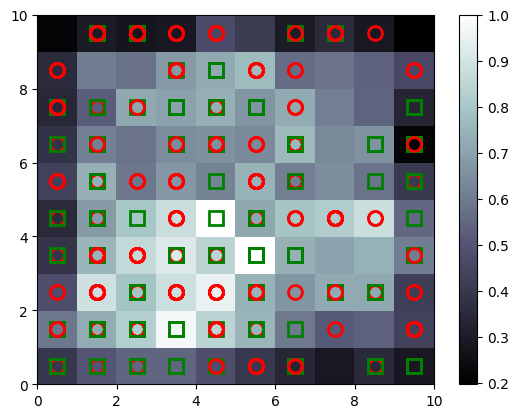

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

## Finding the frauds


In [26]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5, 3)], mappings[(9, 5)]),
                        axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [27]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15789611
15781875
15809837
15761554
15811690
15815095
15759387
15704081
15722479
15810723
15730360
15766663
15703177
15733602
15693382
15752601


In [28]:
customers = df.iloc[:, 1:].values

In [30]:
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [32]:
print(customers)

[[ 0.68873723 -0.80105183  1.34711063 ... -0.48835847  0.03738039
  -0.89530251]
 [-1.45193254 -0.75124044  0.45054795 ... -0.13959116 -0.19541334
  -0.89530251]
 [-1.45193254 -0.16785619 -0.60482292 ...  0.55794344 -0.19541334
  -0.89530251]
 ...
 [-1.45193254 -1.07543661  0.96114643 ... -0.48835847 -0.19541334
   1.11694091]
 [-1.45193254 -0.35021653  1.95822062 ... -0.3721027  -0.19330052
   1.11694091]
 [ 0.68873723  0.79628971 -0.94857229 ...  2.18552419 -0.19541334
   1.11694091]]


## Part 2 - Building the ANN

In [33]:
import tensorflow as tf
tf.__version__

'2.16.1'

### Initializing the ANN

In [34]:
model = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [35]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [36]:
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [37]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [38]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

### Training the ANN on the Training set

In [39]:
model.fit(customers, is_fraud, batch_size= 1, epochs= 2)

Epoch 1/2


690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8828 - loss: 0.4077
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.9732 - loss: 0.1119


In [55]:
y_pred = model.predict(customers)
y_pred = np.concatenate((df.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.sort_values(by = 1, ascending = True, ignore_index = True)
y_pred.head()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


,0,1
0,15605872.0,2.113191e-08
1,15621423.0,7.685725e-06
2,15706762.0,9.341657e-06
3,15568162.0,3.042977e-05
4,15593345.0,3.613259e-05


## Save model

In [40]:
# model.save('model_credit.h5')

# model_json = model.to_json()
# with open("model_architecture.json", "w") as json_file:
#     json_file.write(model_json)
    

# # from tensorflow.keras.models import load_model

# # # Memuat seluruh model
# # loaded_model = load_model('model_Churn_prediction.h5')